# Data Analysis for the M5 - Forecasting Dataset

### Ventagium Technical Assessment
6/13/2022

Alan Tang

## Importing Libraries

I will begin by importing the necessary libraries and modules for data processing, analytics and visualization. 

In [3]:
# For data processing
import pandas as pd
# For linear algebra
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Allow pandas to display 500 columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Data

I will now import the datasets:

- calendar: contains information about the dates on which products are sold
- sales_train_validation: contains the historical daily unit sales data per product and store
- sell_prices: contains information about the price of the products sold per store and date

Since I will only be performing exploratory data analysis (EDA) since I won´t be needing the other sample files for the Kaggle competition.

In [4]:
# Importing the calendar dataset
calendar = pd.read_csv("calendar.csv")

# Inspecting the data
print(calendar.shape)
calendar.head()

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


calendar data description: 

- date: date, yyyy-mm-dd
- wm_yr_wk: date id
- weekday: weekday (mon, tue, wed,.., sun)
- wday: id of weekday (1- sat, 2- sun, 3- mon,..., 7- fri)
- month: month numner 1-12
- year: year
- d: day, starting on 2011-01-29 (d1)
- event_name_1: if the day contains an event (name of the event)
- event_type_1: type of event 1
- event_name_2: if the day contains a second event
- event_type_2: type of event 2
- snap_CA, snap_TX, snap_WI: binary (0-1) indicating if Supplemental Nutritious Assistance Program (snap) purchases are allowed on the date

In [6]:
# Importing the sales dataset
sales = pd.read_csv("sales_train_validation.csv")

# Inspecting the data
print(sales.shape)
sales.head()

(30490, 1920)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1920 entries, id to total sales
dtypes: int64(1914), object(6)
memory usage: 446.6+ MB


sales data description:

- id: row id
- item_id: product id
- dept_id: department of the product id
- cat_id: category of the product id
- store_id: store of the product id
- state_id: state of the store
- columns d_1:d1913: contain the number of products sold on each day (may need to melt?)

In [8]:
# Importing the prices dataset
prices = pd.read_csv("sell_prices.csv")

# Inspecting the dataset
print(prices.shape)
prices.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


prices data description:
- sotre_id: store of the product id
- item_id: product id
- wm_yr_wk: date id
- sell_price: price of each product at each d[i] date. Prices given in a weekly basis and are dynamic.

## Transforming Data

In this section, I will wrangle and transform the data and create custom csvs, to import them later into Power Bi.

### Total Sales

In [12]:
# Calculate number of units sold per day
daily_sales = sales.loc[:,"d_1":"d_1913"].agg(["sum"])

# Traspose the columns to rows and reset index
daily_sales = daily_sales.T.reset_index()

# Rename the columns and index + inspect
daily_sales.rename(columns = {"sum":"units_sold","index":"d"}, inplace = True)
daily_sales.head()

,d,units_sold
0,d_1,32631
1,d_2,31749
2,d_3,23783
3,d_4,25412
4,d_5,19146


In [13]:
# Merge calendar to sales data on "d"
daily_sales = daily_sales.merge(calendar, how = "left", on = "d")

# Set date from calendar as index + inspect
daily_sales = daily_sales.set_index("date")
daily_sales.head()

,d,units_sold,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,
2011-01-29,d_1,32631,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,d_2,31749,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,d_3,23783,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,d_4,25412,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,d_5,19146,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [14]:
# Export to CSV
daily_sales.to_csv("daily_sales")

## Categories

### Hobbies

In [28]:
# Hobbies: calculate sales for hobbies and group them by state + transpose columns into rows
hobbies = sales.loc[(sales["cat_id"] == "HOBBIES")].groupby(["state_id"]).sum().T

In [29]:
# Inspect
hobbies.head()

state_id,CA,TX,WI
d_1,1802,879,1083
d_2,1561,870,926
d_3,1472,526,684
d_4,1405,809,455
d_5,1181,501,132


In [30]:
hobbies.tail()

state_id,CA,TX,WI
d_1910,1590,882,881
d_1911,2015,1056,1014
d_1912,2367,1222,1198
d_1913,2357,1266,1060
total sales,3039883,1592339,1492578


In [31]:
# Drop last row
hobbies.drop(["total sales"], axis = 0, inplace = True)
hobbies.tail()

state_id,CA,TX,WI
d_1909,1646,980,846
d_1910,1590,882,881
d_1911,2015,1056,1014
d_1912,2367,1222,1198
d_1913,2357,1266,1060


<AxesSubplot:>

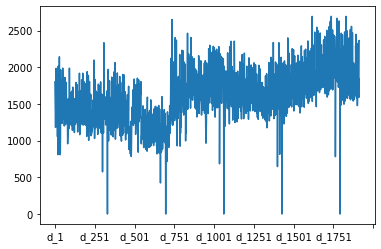

In [32]:
# Check data integrity
hobbies.CA.plot(kind = "line")

In [33]:
# Rename columnds and index
hobbies = hobbies.reset_index().rename(columns = {"index":"d", "CA":"hobbies_CA", "TX":"hobbies_TX", "WI":"hobbies_WI"})
hobbies.head()

state_id,d,hobbies_CA,hobbies_TX,hobbies_WI
0,d_1,1802,879,1083
1,d_2,1561,870,926
2,d_3,1472,526,684
3,d_4,1405,809,455
4,d_5,1181,501,132


In [126]:
hobbies.to_csv("hobbies")

### Household

In [15]:
# Household: calculate units sold for household items and group them by state + transpose
household = sales.loc[(sales["cat_id"] == "HOUSEHOLD")].groupby(["state_id"]).sum().T

In [16]:
# Inspect
household.head()

state_id,CA,TX,WI
d_1,2292,1706,1691
d_2,2382,1730,1522
d_3,1692,1128,1107
d_4,1778,1102,985
d_5,1566,809,354


In [17]:
household.tail()

state_id,CA,TX,WI
d_1910,3419,2553,2391
d_1911,4089,2720,2919
d_1912,5622,3195,3431
d_1913,6024,3251,3183
total sales,6439362,4350246,3691062


In [18]:
# Drop last row
household.drop(["total sales"], axis = 0, inplace = True)
household.tail()

state_id,CA,TX,WI
d_1909,3639,2378,2222
d_1910,3419,2553,2391
d_1911,4089,2720,2919
d_1912,5622,3195,3431
d_1913,6024,3251,3183


In [19]:
# Rename columns + index
household = household.reset_index().rename(columns = {"index":"d", "CA":"household_CA", "TX":"household_TX", "WI":"household_WI"})
household.head()

state_id,d,household_CA,household_TX,household_WI
0,d_1,2292,1706,1691
1,d_2,2382,1730,1522
2,d_3,1692,1128,1107
3,d_4,1778,1102,985
4,d_5,1566,809,354


### Food

In [24]:
# Food: calculate units sold for Food items, group them by state and transpose
food = sales.loc[(sales["cat_id"] == "FOODS")].groupby(["state_id"]).sum().T

food.head()

state_id,CA,TX,WI
d_1,10101,6853,6224
d_2,9862,7030,5866
d_3,6944,5124,5106
d_4,7864,5470,5544
d_5,7178,4602,2823


In [25]:
food.tail()

state_id,CA,TX,WI
d_1910,9479,6167,7671
d_1911,10991,6839,8874
d_1912,13845,7849,10233
d_1913,14806,7765,10083
total sales,19196302,12956421,12937216


In [26]:
# Drop last row
food.drop(["total sales"], axis = 0, inplace = True)
food.tail()

state_id,CA,TX,WI
d_1909,9863,6242,7527
d_1910,9479,6167,7671
d_1911,10991,6839,8874
d_1912,13845,7849,10233
d_1913,14806,7765,10083


In [27]:
# Rename columns
food = food.reset_index().rename(columns = {"index":"d", "CA":"food_CA", "TX":"food_TX", "WI":"food_WI"})
food.head()

state_id,d,food_CA,food_TX,food_WI
0,d_1,10101,6853,6224
1,d_2,9862,7030,5866
2,d_3,6944,5124,5106
3,d_4,7864,5470,5544
4,d_5,7178,4602,2823


### All Merged

I will merge the 3 category datasets + the calendar data into a single DF and export it to csv.

In [34]:
# Merge hobbies + household
all_cats = hobbies.merge(household, how = "left", validate = "1:1")
all_cats.head()

state_id,d,hobbies_CA,hobbies_TX,hobbies_WI,household_CA,household_TX,household_WI
0,d_1,1802,879,1083,2292,1706,1691
1,d_2,1561,870,926,2382,1730,1522
2,d_3,1472,526,684,1692,1128,1107
3,d_4,1405,809,455,1778,1102,985
4,d_5,1181,501,132,1566,809,354


In [36]:
# Merge food
all_cats = all_cats.merge(food, how = "left", validate = "1:1")
all_cats.head()

state_id,d,hobbies_CA,hobbies_TX,hobbies_WI,household_CA,household_TX,household_WI,food_CA,food_TX,food_WI
0,d_1,1802,879,1083,2292,1706,1691,10101,6853,6224
1,d_2,1561,870,926,2382,1730,1522,9862,7030,5866
2,d_3,1472,526,684,1692,1128,1107,6944,5124,5106
3,d_4,1405,809,455,1778,1102,985,7864,5470,5544
4,d_5,1181,501,132,1566,809,354,7178,4602,2823


In [37]:
# Merge calendar + inspect
all_cats = all_cats.merge(calendar, how = "left", validate = "1:1")
all_cats.head()

,d,hobbies_CA,hobbies_TX,hobbies_WI,household_CA,household_TX,household_WI,food_CA,food_TX,food_WI,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,1802,879,1083,2292,1706,1691,10101,6853,6224,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,1561,870,926,2382,1730,1522,9862,7030,5866,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,1472,526,684,1692,1128,1107,6944,5124,5106,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,1405,809,455,1778,1102,985,7864,5470,5544,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,1181,501,132,1566,809,354,7178,4602,2823,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [38]:
# Set date from calendar as index
all_cats = all_cats.set_index("date")
all_cats.head()

,d,hobbies_CA,hobbies_TX,hobbies_WI,household_CA,household_TX,household_WI,food_CA,food_TX,food_WI,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,d_1,1802,879,1083,2292,1706,1691,10101,6853,6224,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,d_2,1561,870,926,2382,1730,1522,9862,7030,5866,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,d_3,1472,526,684,1692,1128,1107,6944,5124,5106,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,d_4,1405,809,455,1778,1102,985,7864,5470,5544,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,d_5,1181,501,132,1566,809,354,7178,4602,2823,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [39]:
# Export to csv
all_cats.to_csv("all_cats")

## Top Item

In this section I calculate the total units sold for the top selling item and merge calendar data to it.

In [48]:
# Item Foods_3_090: calculate total units sold, group by state and transpose
top_item = sales.loc[(sales["item_id"] == "FOODS_3_090")].groupby(["state_id"]).sum().T

top_item.head()

state_id,CA,TX,WI
d_1,400,442,204
d_2,453,381,202
d_3,221,296,156
d_4,240,265,137
d_5,232,206,93


In [49]:
top_item.tail()

state_id,CA,TX,WI
d_1910,185,117,120
d_1911,334,183,112
d_1912,331,230,232
d_1913,250,197,145
total sales,486138,328034,188357


In [50]:
# Drop last column
top_item.drop(["total sales"], axis = 0, inplace = True)
top_item.tail()

state_id,CA,TX,WI
d_1909,192,148,85
d_1910,185,117,120
d_1911,334,183,112
d_1912,331,230,232
d_1913,250,197,145


In [51]:
# Renae columns
top_item = top_item.reset_index().rename(columns = {"index":"d", "CA":"F_3_090_CA", "TX":"F3_090_TX", "WI":"F_3_090_WI"})
top_item.head()

state_id,d,F_3_090_CA,F3_090_TX,F_3_090_WI
0,d_1,400,442,204
1,d_2,453,381,202
2,d_3,221,296,156
3,d_4,240,265,137
4,d_5,232,206,93


In [52]:
# Merge calendar data
top_item = top_item.merge(calendar, how = "left", validate = "1:1")
top_item.head()

,d,F_3_090_CA,F3_090_TX,F_3_090_WI,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,400,442,204,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,453,381,202,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,221,296,156,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,240,265,137,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,232,206,93,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


In [53]:
# Export to csv
top_item.to_csv("top_item")

## Merging prices and calendar

In this part I merge the prices data and the calendar data

In [54]:
# Merge prices and calendar
prices_calendar = prices.merge(calendar, how = "left", on = "wm_yr_wk")

In [55]:
prices_calendar.head()

,store_id,item_id,wm_yr_wk,sell_price,date,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,CA_1,HOBBIES_1_001,11325,9.58,2013-07-13,Saturday,1,7,2013,d_897,NaN,NaN,NaN,NaN,0,1,0
1,CA_1,HOBBIES_1_001,11325,9.58,2013-07-14,Sunday,2,7,2013,d_898,NaN,NaN,NaN,NaN,0,0,1
2,CA_1,HOBBIES_1_001,11325,9.58,2013-07-15,Monday,3,7,2013,d_899,NaN,NaN,NaN,NaN,0,1,1
3,CA_1,HOBBIES_1_001,11325,9.58,2013-07-16,Tuesday,4,7,2013,d_900,NaN,NaN,NaN,NaN,0,0,0
4,CA_1,HOBBIES_1_001,11325,9.58,2013-07-17,Wednesday,5,7,2013,d_901,NaN,NaN,NaN,NaN,0,0,0


In [56]:
# Export to csv
prices_calendar.to_csv("prices_calendar")